In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , IsolationForest

from sklearn.metrics import make_scorer, r2_score , mean_absolute_error , mean_squared_error
from sklearn.model_selection import cross_val_score , KFold , train_test_split


import pickle



# Import data

In [ ]:
df = pd.read_csv("data/HousingData.csv")


In [72]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [73]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Fill NA values

['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']


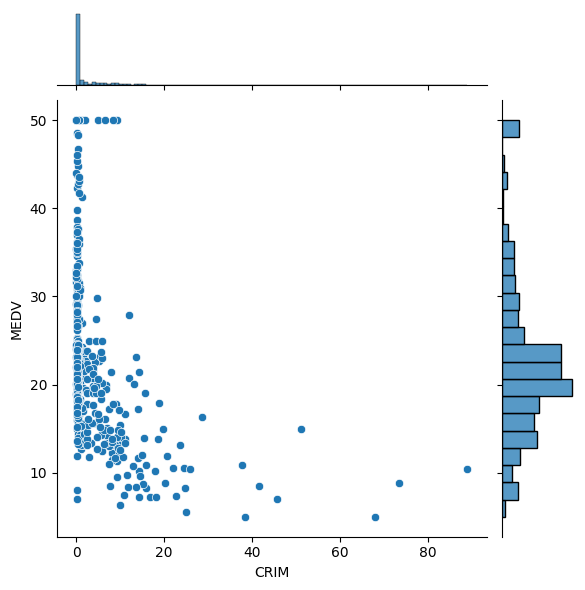

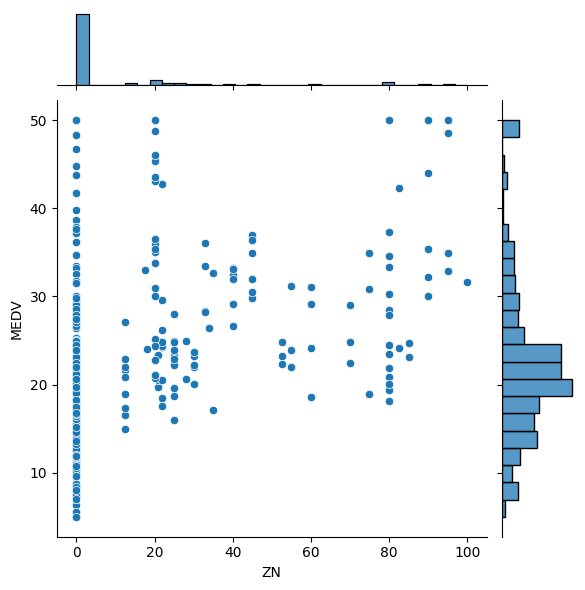

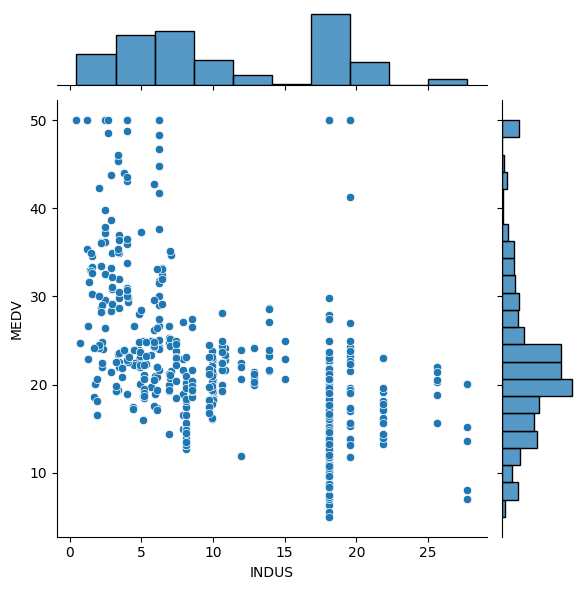

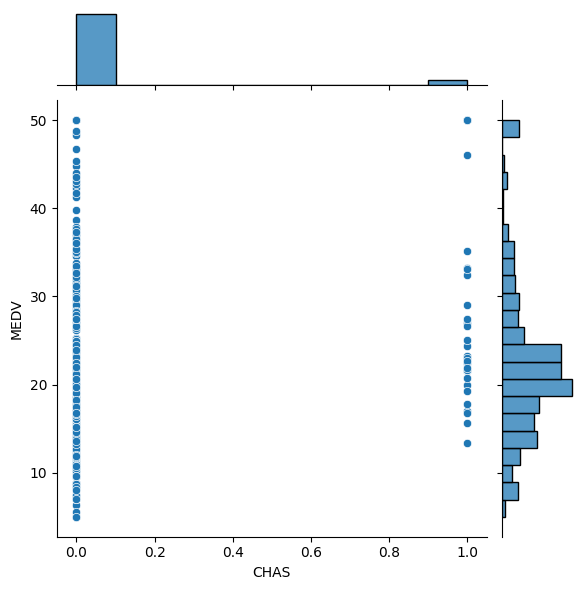

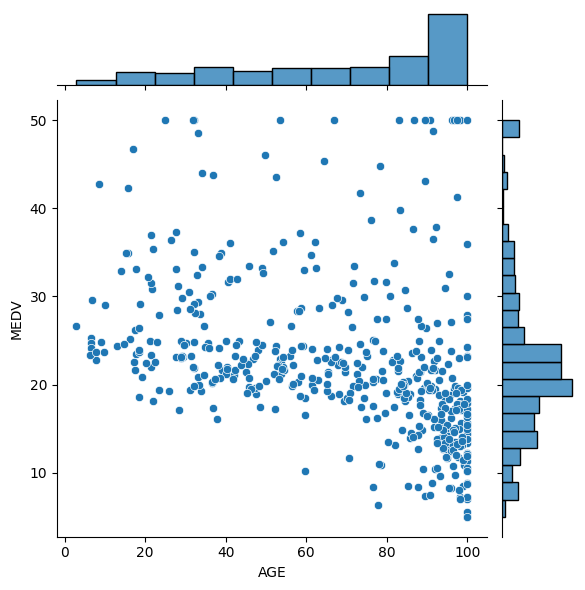

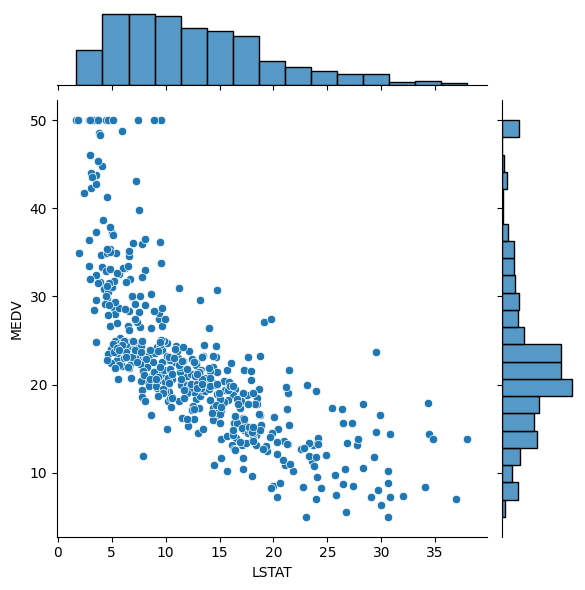

In [74]:
null_columns = df.columns[df.isnull().any()].tolist()
print(null_columns)

for col in null_columns : 

    sns.jointplot(df , x = col , y = 'MEDV')
    plt.show()

In [75]:
df['nCRIM'] = df["CRIM"].interpolate(method='polynomial' , order = 2) 

In [76]:
df['nZN'] = df["ZN"].interpolate(method='nearest')

In [77]:
df["nINDUS"] = df["INDUS"].interpolate(method='nearest')

In [78]:
df['nCHAS'] = df['CHAS'].fillna(df['CHAS'].mode()[0])

In [79]:
df["nAGE"] = df["AGE"].interpolate(method='polynomial' , order = 2) 


In [80]:
df["nLSTAT"] = df["LSTAT"].interpolate(method='polynomial' , order = 2)

In [81]:
df.drop(columns= null_columns , inplace= True)

In [ ]:
df.to_csv("data/hd1.csv")

# Data Visualization

In [ ]:
df = pd.read_csv("data/hd1.csv")

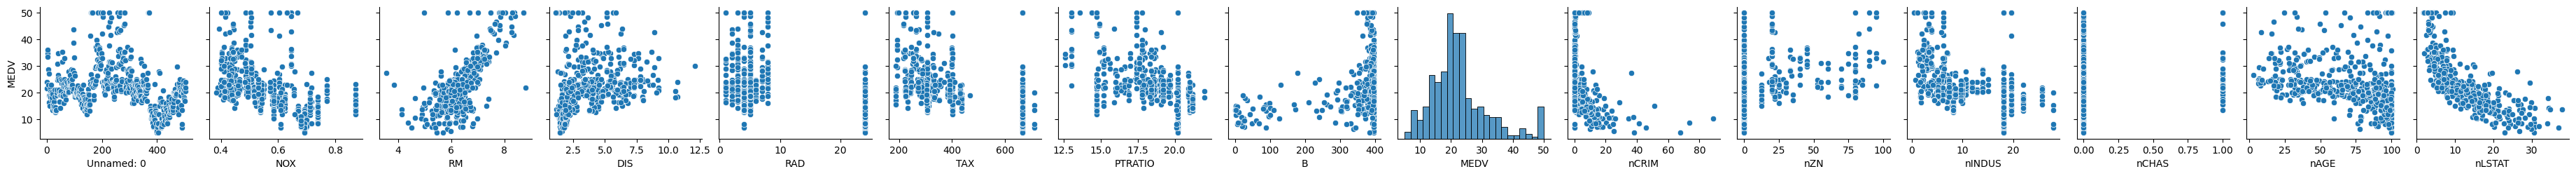

In [3]:
sns.pairplot(df , y_vars= 'MEDV')

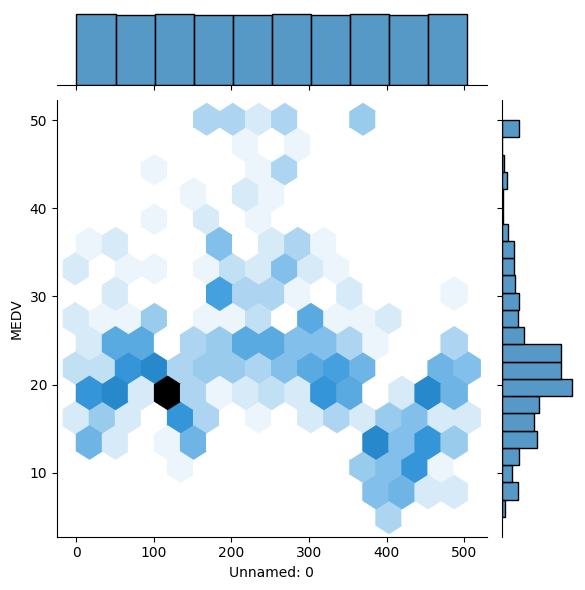

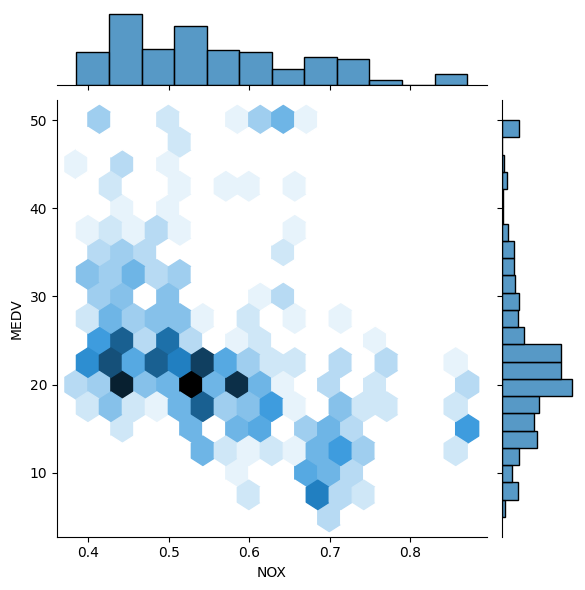

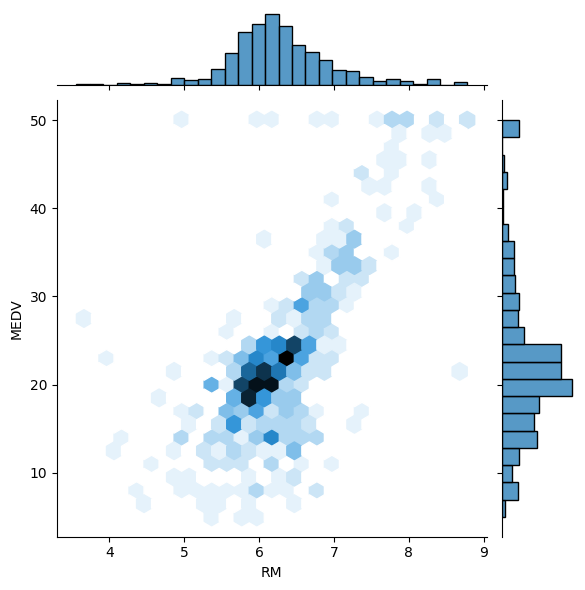

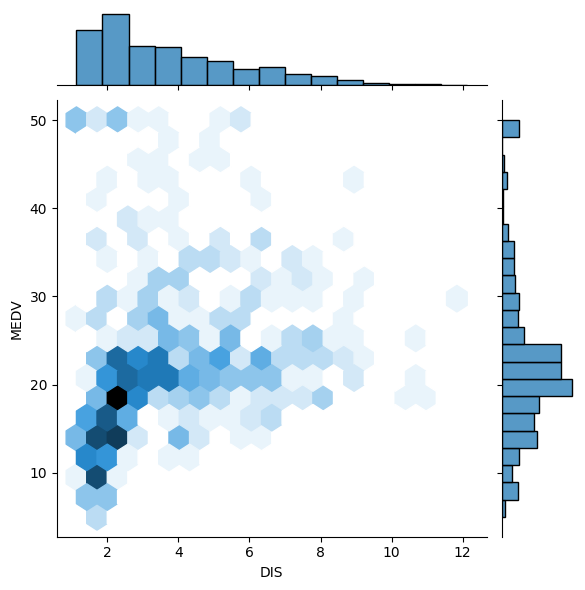

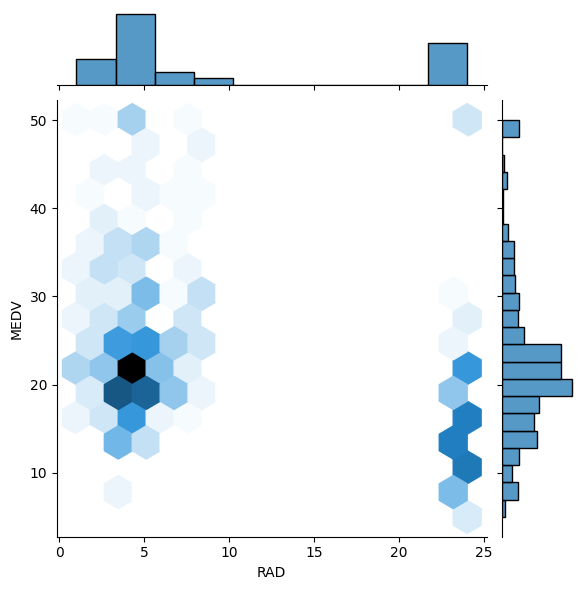

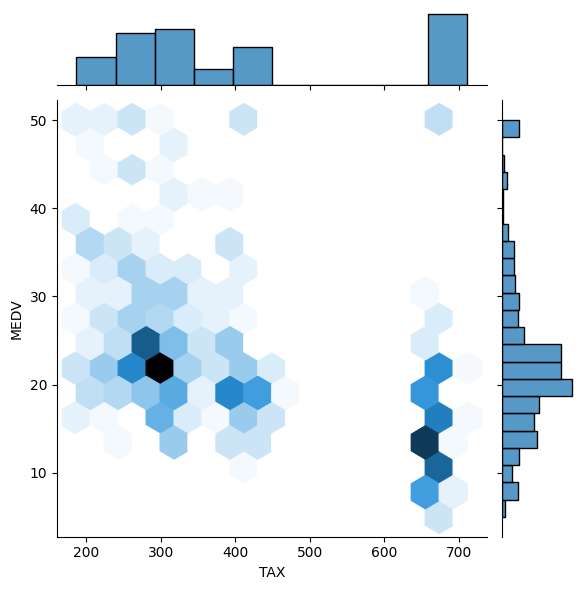

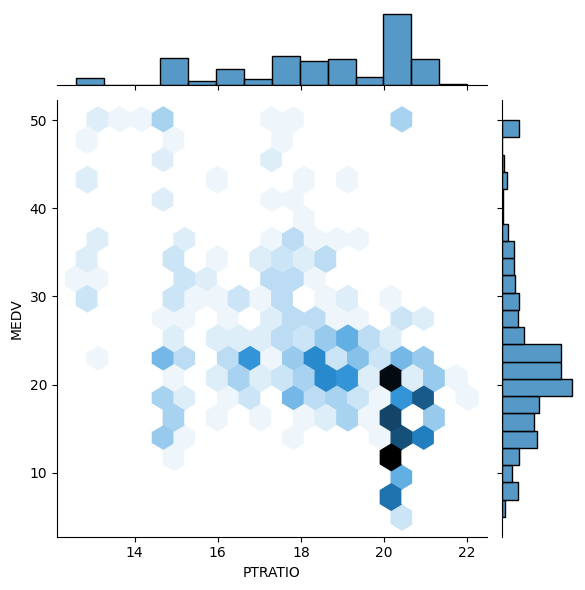

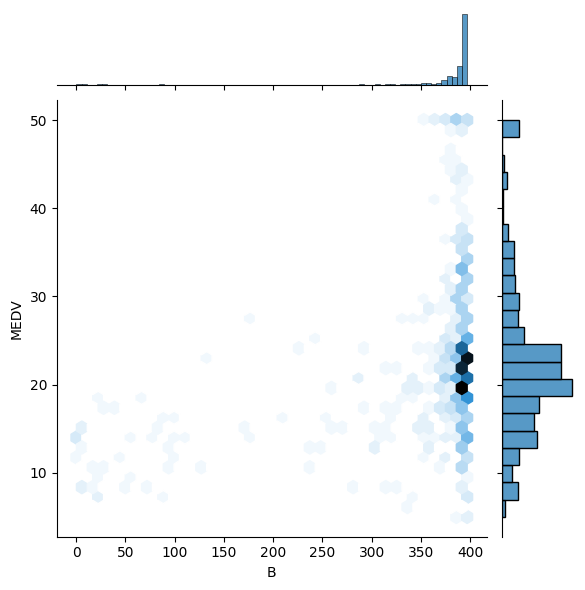

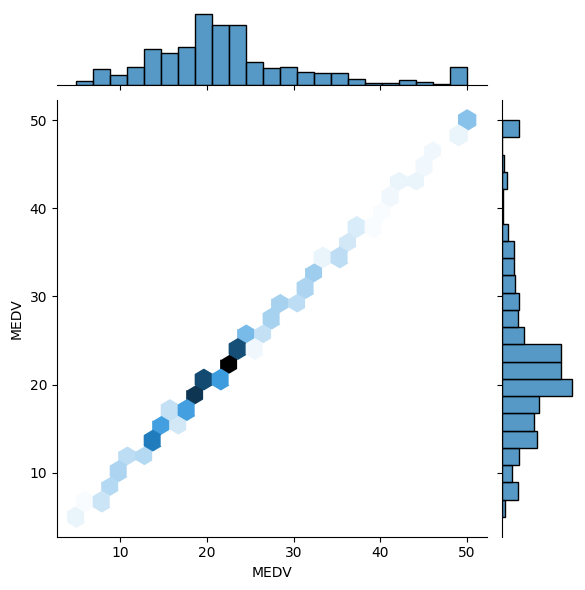

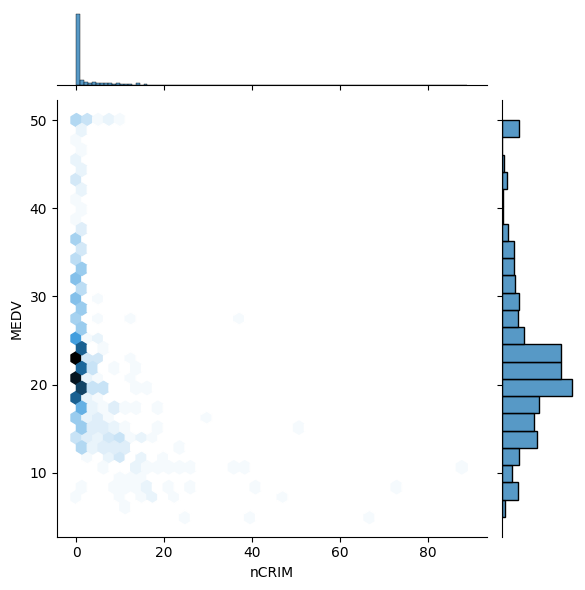

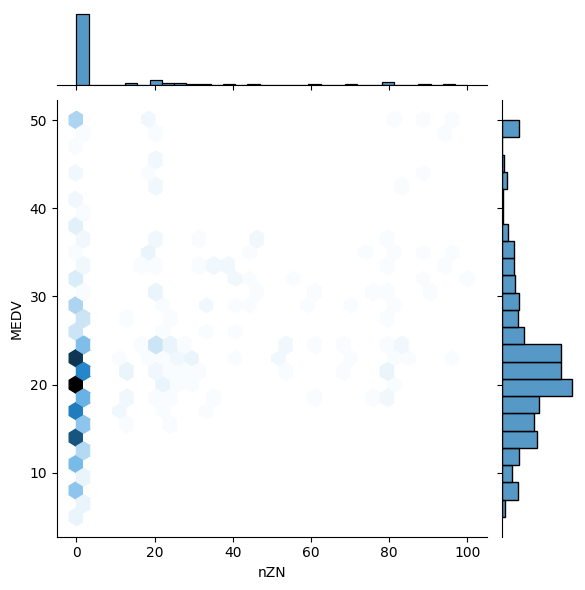

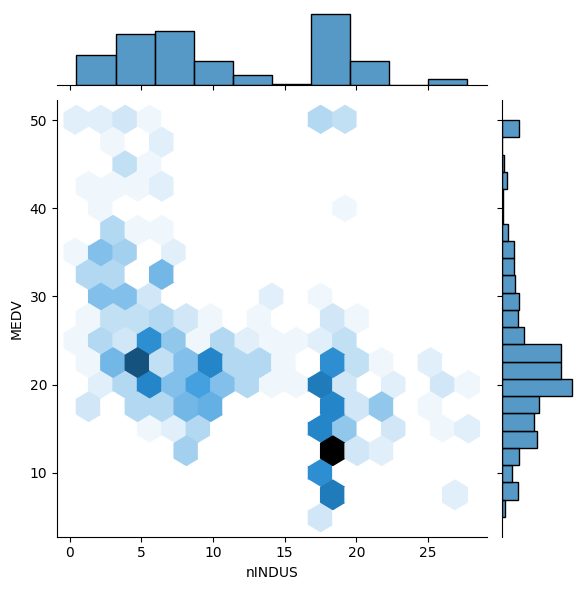

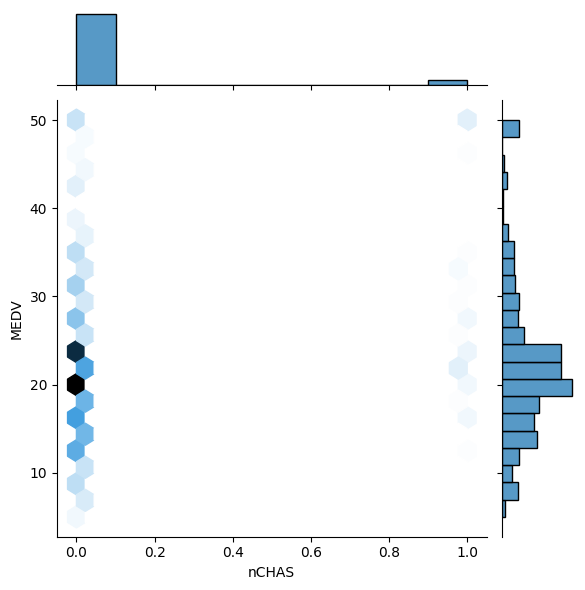

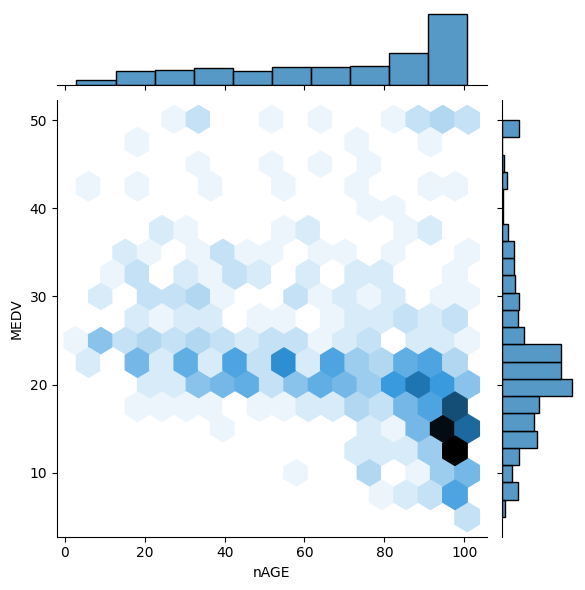

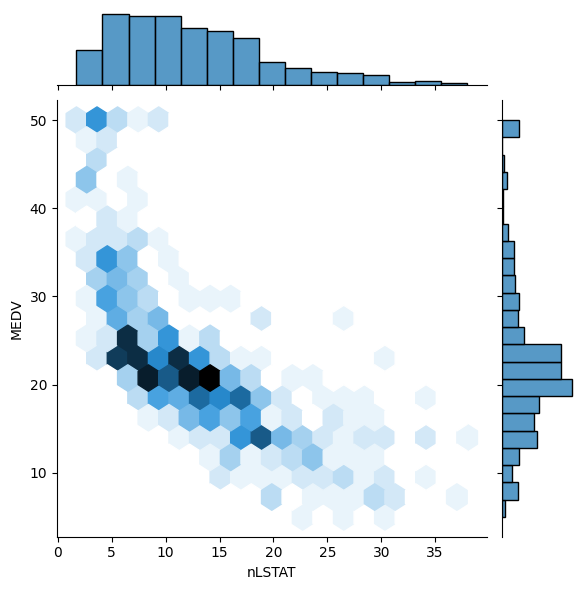

In [4]:
for col in df.columns : 

    sns.jointplot(df , x = col , y = 'MEDV' , kind = "hex")
    plt.show()

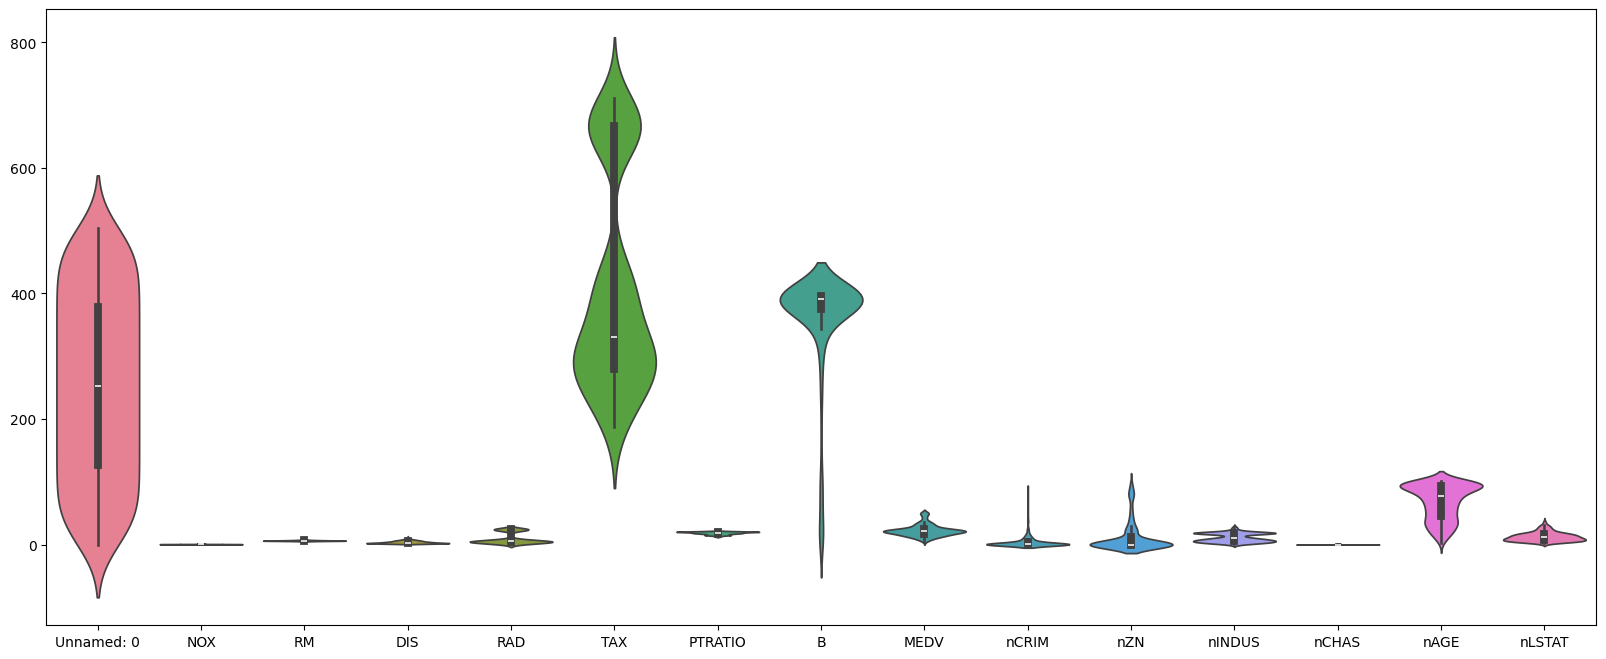

In [5]:
plt.figure(figsize= (20 , 8))
sns.violinplot(data = df )
plt.show()

# Data Preprocessing

## Outlier Removal

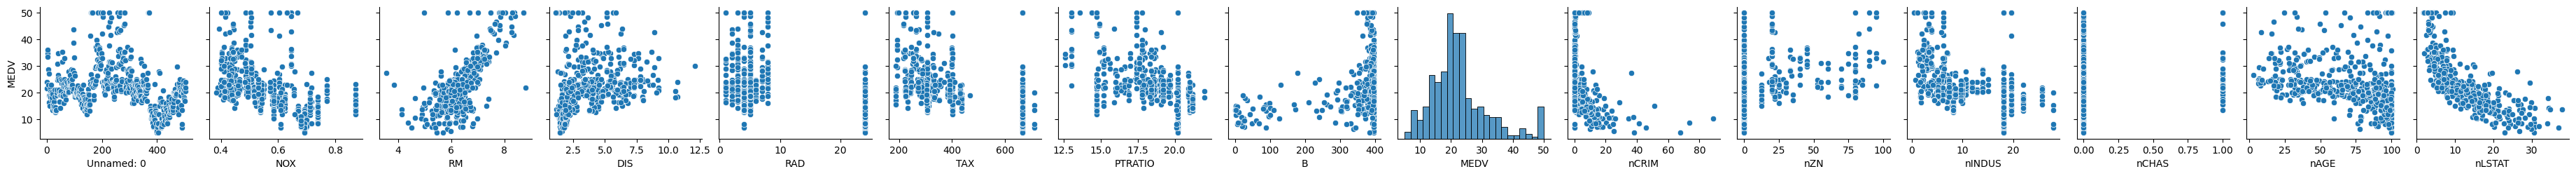

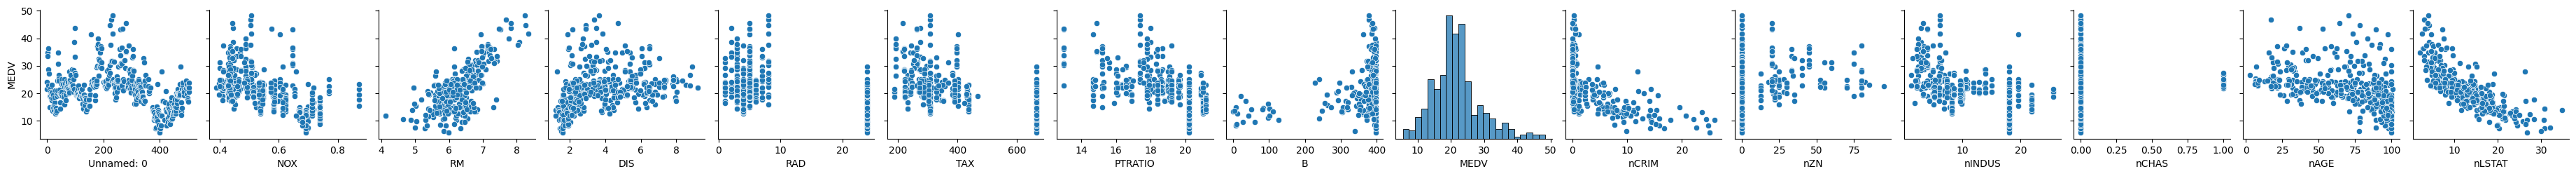

In [6]:

contamination = 0.2 # contamination=0.2 means 20% outliers expected

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=contamination, random_state=42)  # contamination=0.2 means 20% outliers expected

# Fit the model and predict outliers
outlier_preds = iso_forest.fit_predict(df)

# '1' indicates inliers (normal points), '-1' indicates outliers
df_no_outliers = df[outlier_preds == 1]  # Keep only normal points (inliers)


sns.pairplot(df , y_vars='MEDV')
sns.pairplot(df_no_outliers , y_vars='MEDV')

plt.show()

In [7]:
df_no_outliers.describe()


,Unnamed: 0,NOX,RM,DIS,RAD,TAX,PTRATIO,B,MEDV,nCRIM,nZN,nINDUS,nCHAS,nAGE,nLSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,245.101485,0.548288,6.263688,3.813540,9.311881,398.957921,18.59604,365.297450,21.725743,2.690823,8.919554,10.702921,0.019802,67.849939,12.328049
std,150.379576,0.107301,0.558874,1.870974,8.498241,162.790845,2.01287,78.941306,7.170132,5.005774,19.091957,6.371794,0.139492,27.352700,6.145509
min,0.000000,0.389000,4.138000,1.174200,1.000000,188.000000,13.00000,0.320000,5.600000,0.006320,0.000000,1.250000,0.000000,2.900000,1.980000
25%,107.750000,0.453000,5.921500,2.268875,4.000000,280.750000,17.40000,377.980000,17.500000,0.082382,0.000000,5.190000,0.000000,45.675000,7.420000
50%,243.500000,0.524000,6.209000,3.372550,5.000000,311.000000,19.10000,392.475000,21.150000,0.227080,0.000000,8.560000,0.000000,74.350000,11.430000
75%,378.250000,0.624000,6.546750,5.214600,8.000000,437.000000,20.20000,396.900000,24.425000,2.496018,0.000000,18.100000,0.000000,92.925000,16.222500
max,504.000000,0.871000,8.337000,9.220300,24.000000,666.000000,21.20000,396.900000,48.300000,25.940600,95.000000,25.650000,1.000000,100.731155,34.770000


In [8]:
df = df_no_outliers.copy(deep=True)
del df_no_outliers

# Data Scaling

In [9]:


X = df.drop('MEDV', axis=1)
y = df['MEDV']


In [10]:
X

,Unnamed: 0,NOX,RM,DIS,RAD,TAX,PTRATIO,B,nCRIM,nZN,nINDUS,nCHAS,nAGE,nLSTAT
0,0,0.538,6.575,4.0900,1,296,15.3,396.90,0.00632,18.0,2.31,0.0,65.2,4.980000
1,1,0.469,6.421,4.9671,2,242,17.8,396.90,0.02731,0.0,7.07,0.0,78.9,9.140000
2,2,0.469,7.185,4.9671,2,242,17.8,392.83,0.02729,0.0,7.07,0.0,61.1,4.030000
3,3,0.458,6.998,6.0622,3,222,18.7,394.63,0.03237,0.0,2.18,0.0,45.8,2.940000
4,4,0.458,7.147,6.0622,3,222,18.7,396.90,0.06905,0.0,2.18,0.0,54.2,2.645798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,500,0.585,6.027,2.4982,6,391,19.2,396.90,0.22438,0.0,9.69,0.0,79.7,14.330000
501,501,0.573,6.593,2.4786,1,273,21.0,391.99,0.06263,0.0,11.93,0.0,69.1,12.225952
502,502,0.573,6.120,2.2875,1,273,21.0,396.90,0.04527,0.0,11.93,0.0,76.7,9.080000
503,503,0.573,6.976,2.1675,1,273,21.0,396.90,0.06076,0.0,11.93,0.0,91.0,5.640000


In [11]:







scaler = StandardScaler()  # Standardization (mean=0, std=1)
X = scaler.fit_transform(X , y )



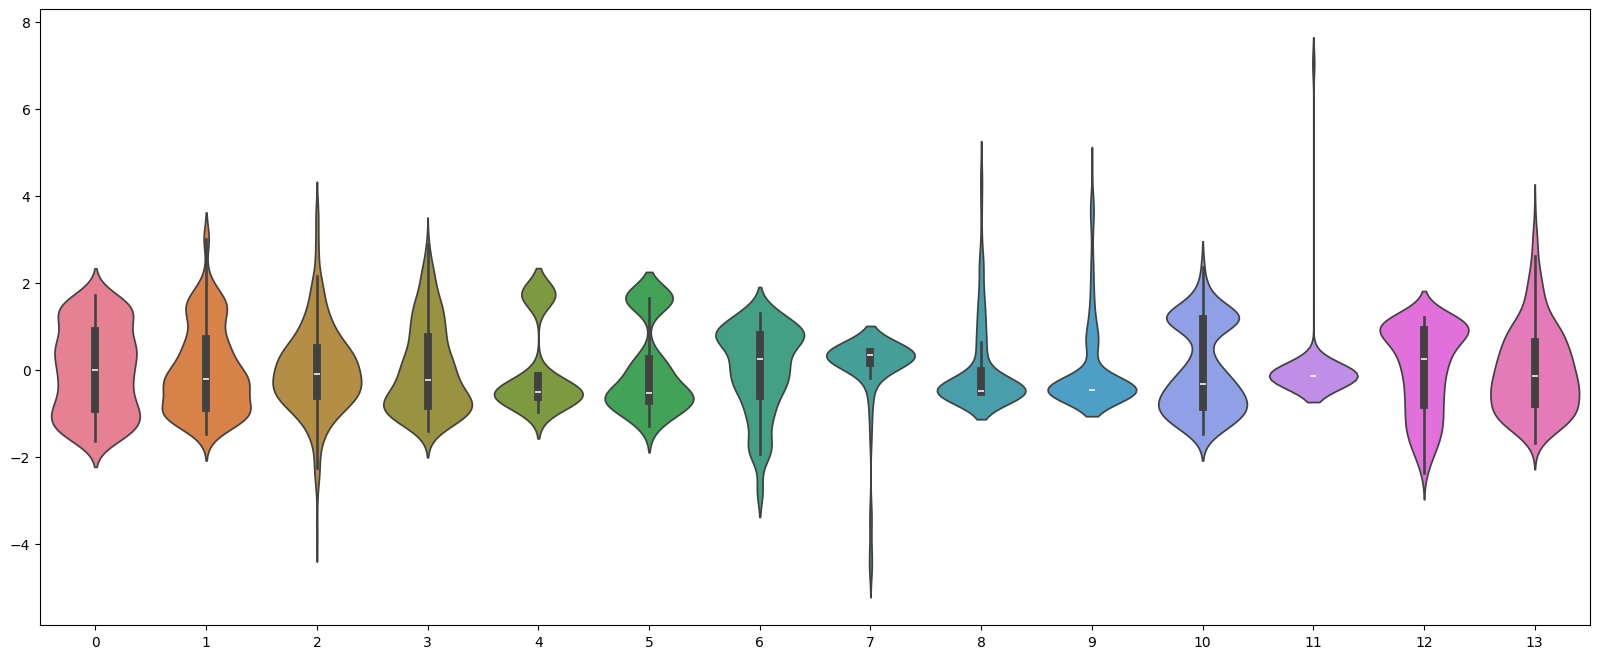

In [12]:
plt.figure(figsize= (20 , 8))
sns.violinplot(data = X )
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:


models = [LinearRegression(),
 KNeighborsRegressor(n_neighbors=3),
 KNeighborsRegressor(n_neighbors=3, weights='distance'),
 KNeighborsRegressor(),
 KNeighborsRegressor(weights='distance'),
 KNeighborsRegressor(n_neighbors=10),
 KNeighborsRegressor(n_neighbors=10, weights='distance'),
 RandomForestRegressor(n_estimators=10, random_state=42),
 RandomForestRegressor(criterion='absolute_error', n_estimators=10,
                       random_state=42),
 RandomForestRegressor(criterion='friedman_mse', n_estimators=10,
                       random_state=42),
 RandomForestRegressor(n_estimators=20, random_state=42),
 RandomForestRegressor(criterion='absolute_error', n_estimators=20,
                       random_state=42),
 RandomForestRegressor(criterion='friedman_mse', n_estimators=20,
                       random_state=42),
 RandomForestRegressor(n_estimators=50, random_state=42),
 RandomForestRegressor(criterion='absolute_error', n_estimators=50,
                       random_state=42),
 RandomForestRegressor(criterion='friedman_mse', n_estimators=50,
                       random_state=42),
 RandomForestRegressor(random_state=42),
 RandomForestRegressor(criterion='absolute_error', random_state=42),
 RandomForestRegressor(criterion='friedman_mse', random_state=42),
 GradientBoostingRegressor(),
 GradientBoostingRegressor(loss='absolute_error'),
 GradientBoostingRegressor(loss='huber'),
 GradientBoostingRegressor(loss='quantile')]

In [ ]:
i = 2
model = models[i]

IndexError: list index out of range

In [ ]:


# Define K-Fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)



# Perform cross-validation using R² score
r2_scorer = make_scorer(r2_score)
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=r2_scorer)

# Fit model 
y_pred = model.fit(X_train , y_train)

# Predictions on the testing dataset
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)




In [ ]:
model_results = {
    "model" : f"{model}",
    "Cross-Validation R2 Scores" : scores.tolist(),
    "Mean R2 Score " : round(scores.mean(),3),
    "Standard Deviation of R2 Scores" : round(scores.std() , 3),
    "Mean Squared Error (MSE)" : round(mse,3),
    "Root Mean Squared Error (RMSE)" : round(rmse,3),
    "Mean Absolute Error (MAE)" : round(mae , 3),
    "R2" : round(r2,2)
}

print(model_results)

{'model': "GradientBoostingRegressor(loss='quantile')", 'Cross-Validation R2 Scores': [0.6040922718673202, 0.31209258305479237, 0.6689792229787319, 0.5092476104315848, 0.746519039853378], 'Mean R2 Score ': np.float64(0.568), 'Standard Deviation of R2 Scores': np.float64(0.15), 'Mean Squared Error (MSE)': 18.626, 'Root Mean Squared Error (RMSE)': np.float64(4.316), 'Mean Absolute Error (MAE)': 3.541, 'R2': 0.6}


In [ ]:



import json



# File path
file_path = r"logs/metrics.json"

# Read the existing data from the file
try:
    with open(file_path, "r") as file:
        data = json.load(file)  # Load existing data
except (FileNotFoundError, json.JSONDecodeError):
    data = []  # Initialize as empty list if file doesn't exist or is empty

# Append new data
data.append(model_results)

# Write the updated data back to the file
with open(file_path, "w") as file:
    json.dump(data, file, indent=4)









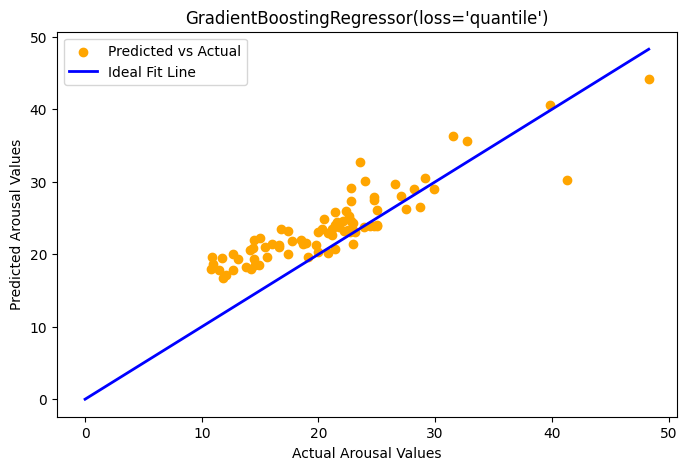

In [ ]:
# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='orange', label='Predicted vs Actual')
plt.plot([0, y_test.max()], [0,y_test.max()], color='blue', linewidth=2, label='Ideal Fit Line')
plt.title(f"{model}")
plt.xlabel("Actual Arousal Values")
plt.ylabel("Predicted Arousal Values")
plt.legend()
plt.savefig(f"plots/{model}.png")
plt.show()






In [ ]:
with open(f"models/{model}.pkl", "wb") as file:
    pickle.dump(model, file)
